In [6]:
import pandas as pd
import numpy as np
import utils
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Carga del Dataset:
- El dataset contiene información sobre clientes de un centro comercial, como su género, edad, ingresos anuales y puntaje de gasto.
- Utiliza el archivo «Mall_Customers.csv» y cárgalo en tu entorno de trabajo.


In [4]:
data_path_train='../ejercicios_core/data/Mall_Customers.csv'
df = pd.read_csv(data_path_train)

df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Selección de Variables:
- Para este análisis, selecciona las variables ‘Annual Income (k$)’ y ‘Spending Score (1-100)’, ya que representan características importantes relacionadas con el comportamiento de compra.


Implementación de K-means:
- Aplica el algoritmo K-means utilizando diferentes valores de K (por ejemplo, K = 3, 4, 5) y observa cómo se agrupan los clientes.
- Visualiza los resultados utilizando gráficos de dispersión que representen los clusters y los centroides.


c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")
c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\skl

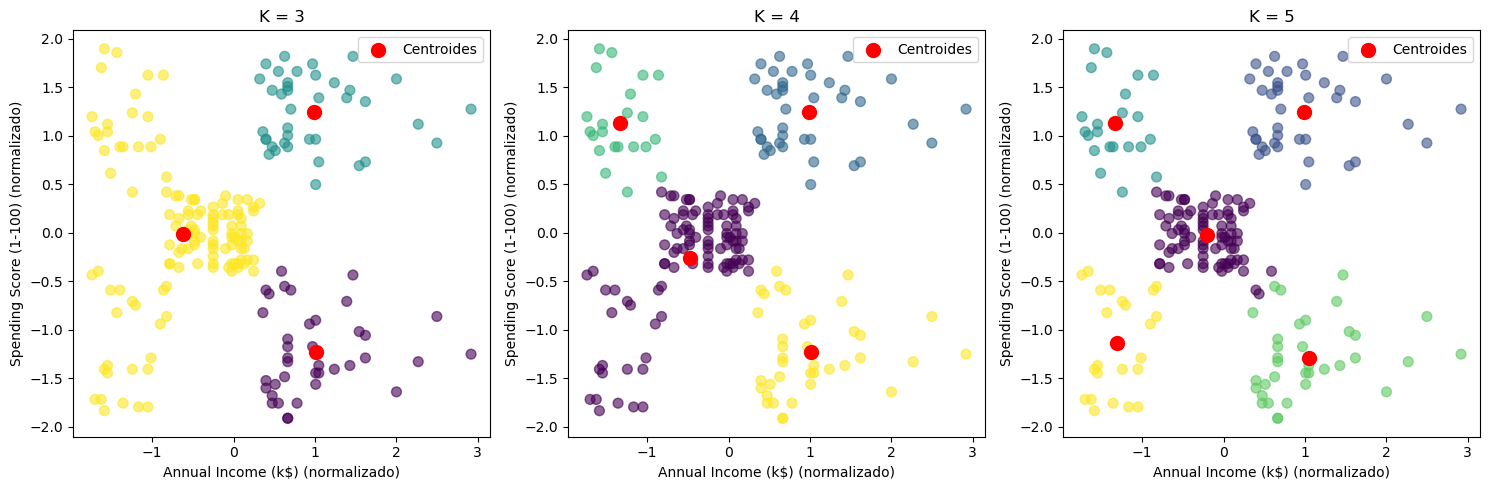

In [7]:
# Selección de variables
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Normalización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicación de K-means con diferentes valores de K
k_values = [3, 4, 5]
plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    clusters = kmeans.predict(X_scaled)
    
    # Visualización de resultados
    plt.subplot(1, len(k_values), i + 1)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.6)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=100, label='Centroides')
    plt.title(f'K = {k}')
    plt.xlabel('Annual Income (k$) (normalizado)')
    plt.ylabel('Spending Score (1-100) (normalizado)')
    plt.legend()

plt.tight_layout()
plt.show()

Elbow Method:
- Utiliza el método del codo para identificar el número óptimo de clusters. Este método consiste en ejecutar K-means con diferentes valores de K y calcular la suma de errores cuadráticos (SSE). El valor óptimo de K se encuentra donde se produce una disminución significativa en el SSE.


c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ENRIF\anaconda3\envs\bootcamp_coding_dojo\Lib\sit

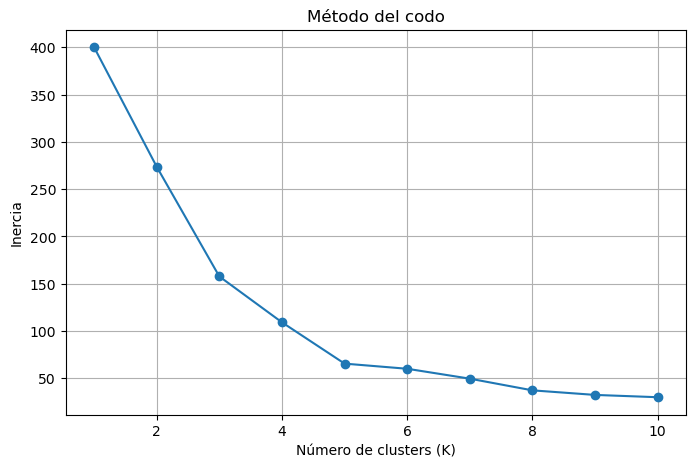

In [8]:
# Evaluación de la inercia para determinar el valor óptimo de K
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Gráfica del método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clusters (K)')
plt.ylabel('Inercia')
plt.grid()
plt.show()

Con base en este gráfico, K=5K=5 es una buena elección, ya que equilibra la reducción de la inercia y la complejidad del modelo.

Interpretación de Clusters:
- Una vez obtenidos los clusters, analiza cada grupo. ¿Qué características tienen en común los clientes de cada cluster? ¿Cómo podrías usar esta información para diseñar estrategias de marketing personalizadas?


K = 5:

- Cluster 1 (amarillo): Clientes con ingresos bajos y alta puntuación de gasto (clientes jóvenes que podrían estar gastando más).
- Cluster 2 (morado): Clientes con ingresos bajos y baja puntuación de gasto (clientes más cautelosos o con menos poder adquisitivo).
- Cluster 3 (verde claro): Clientes con ingresos medios-altos y baja puntuación de gasto (clientes ahorradores).
- Cluster 4 (azul): Clientes con ingresos altos y alta puntuación de gasto (clientes premium que gastan mucho).
- Cluster 5 (verde azulado): Clientes con ingresos altos pero baja puntuación de gasto (clientes de alto poder adquisitivo pero poco comprometidos con compras).

Análisis de Resultados:
- Discute los resultados obtenidos. ¿Qué insights se pueden extraer de los grupos de clientes identificados? ¿Existen patrones o comportamientos comunes?




* Clientes Premium (Cluster 4): Ingresos altos y alta puntuación de gasto.
    Estrategia: Ofrecer programas VIP, beneficios exclusivos y descuentos en productos premium para mantener su lealtad.

* Clientes Cautelosos (Cluster 2): Ingresos bajos y baja puntuación de gasto.
    Estrategia: Ofrecer promociones, descuentos y productos asequibles para aumentar su participación.

* Clientes Ahorradores (Cluster 3): Ingresos altos y baja puntuación de gasto.
    Estrategia: Diseñar campañas específicas que promuevan productos de mayor valor, destacando calidad y exclusividad.

* Clientes Jóvenes Gastadores (Cluster 1): Ingresos bajos pero alta puntuación de gasto.
    Estrategia: Implementar ofertas y programas de lealtad atractivos para mantenerlos activos.

* Clientes Moderados (Cluster 5): Ingresos medios y comportamiento balanceado.
    Estrategia: Campañas que ofrezcan valor adicional, como paquetes de productos o recompensas por compras frecuentes.

Expansión del Algoritmo y Aplicaciones

El algoritmo K-means tiene una amplia gama de aplicaciones en diversas industrias. Algunos ejemplos incluyen:

– Segmentación de Clientes: Agrupar a los clientes según su comportamiento de compra o interacción con un producto.
– Compresión de Imágenes: Reducir el número de colores en una imagen agrupando píxeles similares.
– Agrupación de Documentos: Clasificar documentos en función de su similitud textual.

En esta actividad, el enfoque está en la segmentación de clientes para un centro comercial, pero el mismo algoritmo puede aplicarse a otros dominios como la biología, el procesamiento de señales y la detección de anomalías.
